In [1]:
import numpy as np 
import pandas as pd 
import hiive.mdptoolbox 
import hiive.mdptoolbox.mdp as mdp
import hiive.mdptoolbox.example
import mdptoolbox, mdptoolbox.example
import gym
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

## Frozen Lake 4x4 with value and policy iteration 

In [129]:
env = gym.make("FrozenLake-v0")
env.reset()
states = env.observation_space.n
actions = env.action_space.n

In [130]:
actions

4

In [131]:
states

16

In [132]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [133]:
rewards = np.zeros([states, actions])
for s in range(states):
    for a in range(actions):
        for data in env.P[s][a]:
            prob, next_state, reward, _ = data
            if reward > 0:
                # find state:
                if next_state - s == 1:
                    act = 2
                elif s - next_state == 1:
                    act = 0
                elif s - next_state == 4:
                    act = 3
                elif next_state - s == 4:
                    act = 1
                rewards[s, act] = reward

In [134]:
rewards

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.]])

In [135]:
probs = np.zeros([actions, states, states])
for s in range(states):
    for a in range(actions):
        for data in env.P[s][a]:
            prob, next_state, reward, _ = data
            #print(prob, next_state, reward)
            probs[a, s, next_state] = prob

        probs[a, s, :] = probs[a, s, :] / np.sum(probs[a, s, :])

In [136]:
pi = mdp.PolicyIteration(probs, rewards, 0.99)
pi_stats = pi.run()

In [137]:
len(pi_stats)

6

In [138]:
pi_stats

[{'State': None,
  'Action': None,
  'Reward': 1.8354603155504081,
  'Error': 0.6057019041316346,
  'Time': 0.02734208106994629,
  'Max V': 1.8354603155504081,
  'Mean V': 0.18798325082178574,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 2.0527569893830866,
  'Error': 0.15774996646972517,
  'Time': 0.029397964477539062,
  'Max V': 2.0527569893830866,
  'Mean V': 0.509667550270174,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 2.1918092155914386,
  'Error': 0.1150760644574299,
  'Time': 0.029944181442260742,
  'Max V': 2.1918092155914386,
  'Mean V': 0.7496465707263472,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 2.239735503723863,
  'Error': 0.11714436582623788,
  'Time': 0.03489494323730469,
  'Max V': 2.239735503723863,
  'Mean V': 0.9242478202620469,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 2.277772723123369,
  'Error': 0.047659449222203776,
  'Time': 0.03636312484741211,
  'Max V': 2.27777272312

In [29]:
# time 
pi_stats[-1]['Time']

0.004420042037963867

In [30]:
meanV = [x['Mean V'] for x in pi_stats]

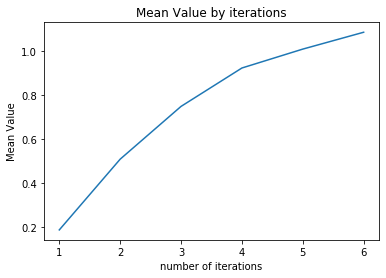

In [31]:
plt.plot(range(1, 7), meanV)
plt.title("Mean Value by iterations")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
plt.show()

In [32]:
p_actions = {
    0:'Left',
    1:'Down',
    2:'Right', 
    3:'Up'
}

In [33]:
pp = []
for p in pi.policy:
    pp.append(p_actions[p])

In [34]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [35]:
pp = np.array(pp).reshape(4,4)

In [36]:
pp

array([['Left', 'Up', 'Up', 'Up'],
       ['Left', 'Left', 'Right', 'Left'],
       ['Up', 'Down', 'Left', 'Left'],
       ['Left', 'Right', 'Right', 'Left']], dtype='<U5')

In [144]:
vi = mdp.ValueIteration(probs, rewards, 0.99)
vi_stats = vi.run()

In [145]:
len(vi_stats)

190

In [146]:
vi.thresh

0.00010101010101010109

In [148]:
vv = []
for p in vi.policy:
    vv.append(p_actions[p])
vv = np.array(vv).reshape(4,4)
vv

array([['Left', 'Up', 'Up', 'Up'],
       ['Left', 'Left', 'Left', 'Left'],
       ['Up', 'Down', 'Left', 'Left'],
       ['Left', 'Right', 'Right', 'Left']], dtype='<U5')

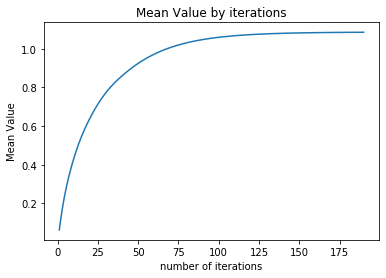

In [147]:
meanV_v = [x['Mean V'] for x in vi_stats]

plt.plot(range(1, 191), meanV_v)
plt.title("Mean Value by iterations")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
plt.show()

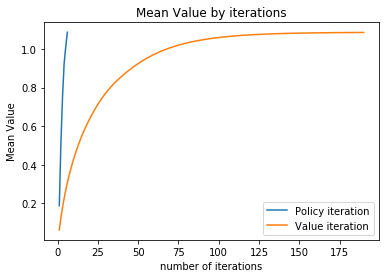

In [40]:
plt.plot(range(1, 7), meanV, label='Policy iteration')
plt.plot(range(1, 191), meanV_v, label='Value iteration')
plt.title("Mean Value by iterations")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
plt.legend()
plt.show()

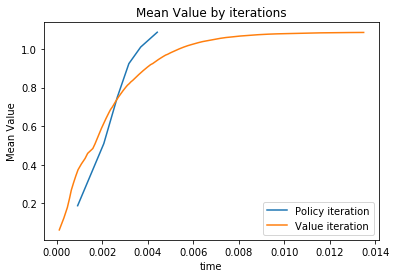

In [42]:
plt.plot([x['Time'] for x in pi_stats], meanV, label='Policy iteration')
plt.plot([x['Time'] for x in vi_stats], meanV_v, label='Value iteration')
plt.title("Mean Value by iterations")
plt.ylabel('Mean Value')
plt.xlabel('time')
plt.legend()
plt.show()

In [43]:
# time on one iteration:
pi_stats[-1]['Time']/len(pi_stats)

0.0007366736729939779

In [45]:
print(format(vi_stats[-1]['Time']/len(vi_stats), 'f'))

0.000071


In [46]:
pi_stats[-1]

{'State': None,
 'Action': None,
 'Reward': 2.311691084344451,
 'Error': 4.440892098500626e-16,
 'Time': 0.004420042037963867,
 'Max V': 2.311691084344451,
 'Mean V': 1.0868510612004927,
 'Iteration': 6}

In [296]:
vi_stats[-1]

{'State': None,
 'Action': None,
 'Reward': 2.31118624751062,
 'Error': 0.00010037250524908004,
 'Time': 0.013200998306274414,
 'Max V': 2.31118624751062,
 'Mean V': 1.0857831544632082,
 'Iteration': 190}

## Forest management  with value and policy iteration 

In [198]:
probs_f, rewards_f = hiive.mdptoolbox.example.forest(S=1000, p=0.01)
pi_f = mdp.PolicyIteration(probs_f, rewards_f, 0.99)
pi_f_stats = pi_f.run()

In [199]:
len(pi_f_stats)

103

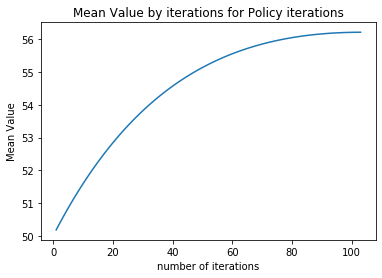

In [200]:
meanV = [x['Mean V'] for x in pi_f_stats]
plt.plot(range(1, 104), meanV)
plt.title("Mean Value by iterations for Policy iterations")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
plt.show()


In [201]:
vi_f = mdp.ValueIteration(probs_f, rewards_f, 0.99)
vi_f_stats = vi_f.run()

In [202]:
vi_f.policy == pi_f.policy

True

In [203]:
sum(vi_f.policy)

896

In [204]:
sum(pi_f.policy)

896

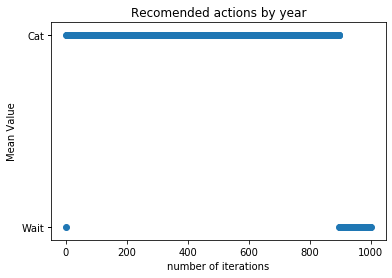

In [206]:
plt.scatter(range(1, 1001), pi_f.policy)
plt.title("Recomended actions by year")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
my_yticks = ['Wait', 'Cat']
plt.yticks(pi_f.policy, my_yticks)
plt.show()

In [207]:
len(vi_f_stats)

527

In [208]:
vi_f.thresh

0.00010101010101010109

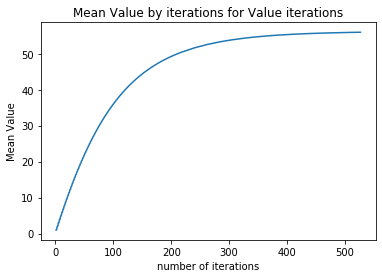

In [209]:
meanV_v = [x['Mean V'] for x in vi_f_stats]

plt.plot(range(1, 528), meanV_v)
plt.title("Mean Value by iterations for Value iterations")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
plt.show()

In [210]:
1/(1-0.98)

49.99999999999996

In [211]:
49/50

0.98

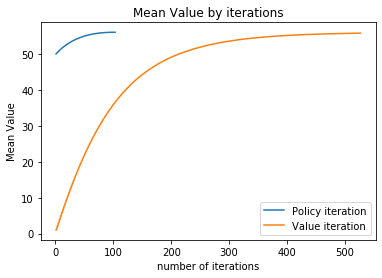

In [212]:
plt.plot(range(1, 104), meanV, label='Policy iteration')
plt.plot(range(1, 528), meanV_v, label='Value iteration')
plt.title("Mean Value by iterations")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
plt.legend()
plt.show()

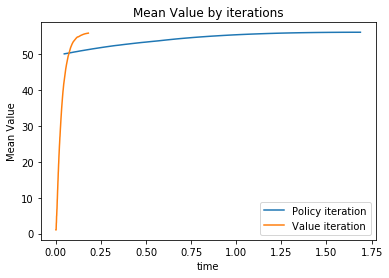

In [213]:
plt.plot([x['Time'] for x in pi_f_stats], meanV, label='Policy iteration')
plt.plot([x['Time'] for x in vi_f_stats], meanV_v, label='Value iteration')
plt.title("Mean Value by iterations")
plt.ylabel('Mean Value')
plt.xlabel('time')
plt.legend()
plt.show()

In [214]:
# time on one iteration:
pi_f_stats[-1]['Time']/len(pi_f_stats)

0.01638775890313306

In [215]:
vi_f_stats[-1]['Time']/len(vi_f_stats)

0.00034253149376422225

In [216]:
pi_f_stats[-1]

{'State': None,
 'Action': None,
 'Reward': 225.6294096105492,
 'Error': 2.842170943040401e-14,
 'Time': 1.687939167022705,
 'Max V': 225.6294096105492,
 'Mean V': 56.214725442991124,
 'Iteration': 103}

In [217]:
vi_f_stats[-1]

{'State': None,
 'Action': None,
 'Reward': 225.37580742354007,
 'Error': 0.00010239640475617762,
 'Time': 0.18051409721374512,
 'Max V': 225.37580742354007,
 'Mean V': 55.96508716980327,
 'Iteration': 527}

## QLearning for a small problem (Frozen Lake 4x4)

/anaconda3/envs/rlearning/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


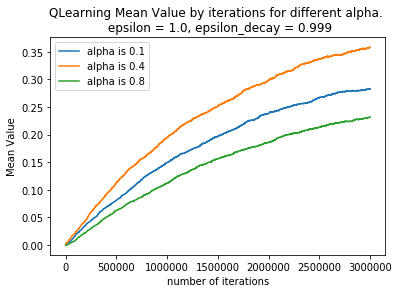

In [122]:
# try different learining rates:
ep = 1.0
dec = 0.999

times = []

for alpha in [0.1, 0.4, 0.8]:
    q_lake = mdp.QLearning(probs, rewards, 0.99, epsilon=ep, alpha=alpha, epsilon_decay=dec)
    q_lake.max_iter = 3000000
    qi_stats = q_lake.run()
    times.append(qi_stats[-1]['Time'])
    
    meanV_qi_lake = [x['Mean V'] for x in qi_stats]
    its = [x['Iteration'] for x in qi_stats]

    plt.plot(its, meanV_qi_lake, label='alpha is ' + str(alpha))
plt.title("QLearning Mean Value by iterations for different alpha. \n epsilon = 1.0, epsilon_decay = 0.999")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
plt.legend()
plt.show()

In [111]:
times

[140.7588768005371, 134.44511818885803, 130.8446810245514]

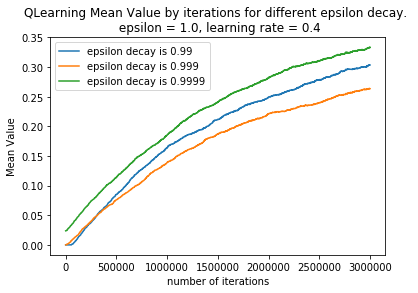

In [123]:
# try different epsilon decay:
ep = 1.0
alpha = 0.4

times = []

for dec in [0.99, 0.999, 0.9999]:
    q_lake = mdp.QLearning(probs, rewards, 0.99, n_iter=1000000, epsilon=ep, alpha=alpha, epsilon_decay=dec)
    q_lake.max_iter = 3000000
    qi_stats = q_lake.run()
    times.append(qi_stats[-1]['Time'])
    
    meanV_qi_lake = [x['Mean V'] for x in qi_stats]
    its = [x['Iteration'] for x in qi_stats]

    plt.plot(its, meanV_qi_lake, label='epsilon decay is ' + str(dec))
plt.title("QLearning Mean Value by iterations for different epsilon decay. \n epsilon = 1.0, learning rate = 0.4")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
plt.legend()
plt.show()

In [124]:
times

[110.79756116867065, 107.62234711647034, 106.51940178871155]

/anaconda3/envs/rlearning/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


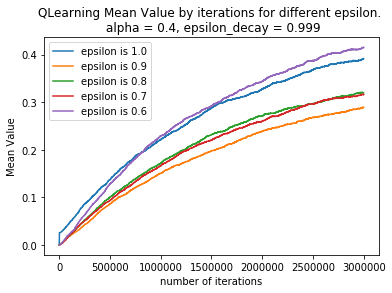

In [125]:
# try different starting epsilon:
alpha = 0.4
dec = 0.9999

times = []

for ep in [1.0, 0.9, 0.8, 0.7, 0.6]:
    q_lake = mdp.QLearning(probs, rewards, 0.99, epsilon=ep, alpha=alpha, epsilon_decay=dec)
    q_lake.max_iter = 3000000
    qi_stats = q_lake.run()
    times.append(qi_stats[-1]['Time'])
    
    meanV_qi_lake = [x['Mean V'] for x in qi_stats]
    its = [x['Iteration'] for x in qi_stats]

    plt.plot(its, meanV_qi_lake, label='epsilon is ' + str(ep))
plt.title("QLearning Mean Value by iterations for different epsilon. \n alpha = 0.4, epsilon_decay = 0.999")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
plt.legend()
plt.show()

In [126]:
times

[124.4707989692688,
 127.42763924598694,
 120.36444091796875,
 119.55503010749817,
 121.4955382347107]

In [127]:
# see the best policy we got:
alpha = 0.4
dec = 0.9999
ep = 0.6
q_lake = mdp.QLearning(probs, rewards, 0.99, epsilon=ep, alpha=alpha, epsilon_decay=dec)
q_lake.max_iter = 3000000
qi_stats = q_lake.run()

In [128]:
pp = []
for p in q_lake.policy:
    pp.append(p_actions[p])
pp = np.array(pp).reshape(4,4)
print(pp)

env.render()

[['Left' 'Down' 'Right' 'Left']
 ['Left' 'Left' 'Left' 'Left']
 ['Right' 'Right' 'Left' 'Left']
 ['Left' 'Up' 'Right' 'Left']]

SFFF
FHFH
FFFH
HFFG


## QLearning for a large problem (Forest)

In [2]:
P, R = hiive.mdptoolbox.example.forest(S=1000, p=0.01)

/anaconda3/envs/rlearning/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


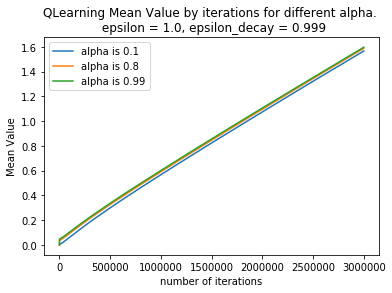

In [223]:
# try different learining rates:
ep = 1.0
dec = 0.999

times = []

for alpha in [0.1,  0.8, 0.99]:
    q_f = mdp.QLearning(P, R, 0.99, epsilon=ep, alpha=alpha, epsilon_decay=dec)
    q_f.max_iter = 3000000
    qi_stats = q_f.run()
    times.append(qi_stats[-1]['Time'])
    
    meanV_qi_forest = [x['Mean V'] for x in qi_stats]
    its = [x['Iteration'] for x in qi_stats]

    plt.plot(its, meanV_qi_forest, label='alpha is ' + str(alpha))
plt.title("QLearning Mean Value by iterations for different alpha. \n epsilon = 1.0, epsilon_decay = 0.999")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
plt.legend()
plt.show()

/anaconda3/envs/rlearning/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


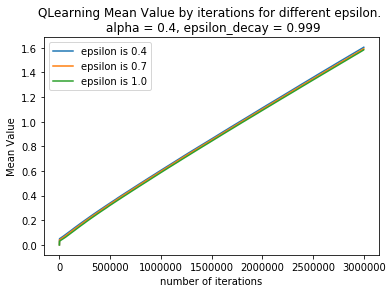

In [230]:
# try different starting epsilon:
alpha = 0.8
dec = 0.999

times = []

for ep in [0.4, 0.7, 1.0]:
    q_f = mdp.QLearning(P, R, 0.99, epsilon=ep, alpha=alpha, epsilon_decay=dec)
    q_f.max_iter = 3000000
    qi_stats = q_f.run()
    times.append(qi_stats[-1]['Time'])
    
    meanV_qi_forest = [x['Mean V'] for x in qi_stats]
    its = [x['Iteration'] for x in qi_stats]

    plt.plot(its, meanV_qi_forest, label='epsilon is ' + str(ep))
plt.title("QLearning Mean Value by iterations for different epsilon. \n alpha = 0.4, epsilon_decay = 0.999")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
plt.legend()
plt.show()

/anaconda3/envs/rlearning/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


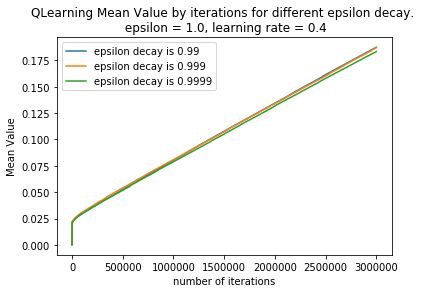

In [233]:
# try different epsilon decay:
ep = 1.0
alpha = 0.8

times = []

for dec in [0.99, 0.999, 0.9999]:
    q_f = mdp.QLearning(P, R, 0.9, alpha=al, epsilon=ep, epsilon_decay=dec)
    q_f.max_iter = 3000000
    qi_stats = q_f.run()
    times.append(qi_stats[-1]['Time'])
    
    meanV_qi_forest = [x['Mean V'] for x in qi_stats]
    its = [x['Iteration'] for x in qi_stats]

    plt.plot(its, meanV_qi_forest, label='epsilon decay is ' + str(dec))
plt.title("QLearning Mean Value by iterations for different epsilon decay. \n epsilon = 1.0, learning rate = 0.4")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
plt.legend()
plt.show()

In [3]:
q_f = mdp.QLearning(P, R, 0.99, alpha=0.8, epsilon=0.5, epsilon_decay=0.999)
q_f.max_iter = 3000000

In [4]:
qi_stats = q_f.run()

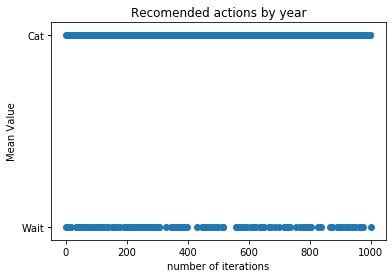

In [6]:
plt.scatter(range(1, 1001), q_f.policy)
plt.title("Recomended actions by year")
plt.ylabel('Mean Value')
plt.xlabel('number of iterations')
my_yticks = ['Wait', 'Cat']
plt.yticks(q_f.policy, my_yticks)
plt.show()

In [8]:
q_f.policy[:20]

(0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1)